In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image
import imutils

**1.1**     Find the main edges in image11.jpg


---



The edges are significant local changes in the image intensity, more simply they're points where the image brightness varies sharply. This implies that edges typically occur on the boundary between two different regions in an image. In general, edge detection is usually the first step in recovering information from images and also it is widely used in image processing like pattern recognition, feature extraction etc.
An edge can be defined as a set of connected pixels that forms a boundary between two disjoint regions.

First step when using edge detection algorithms is to simplify the problem by converting the colored image that contains RGB channels to grayscale in order to measure intensity as a scale from black to white.

Second step is to perform blurring techniques, like Gaussian blur, on the image so as to remove some of the noise before further processing the image. As it will be mentioned in the next steps, in edge detection the numerical derivatives of the pixel intensities have to be computed, so blurring helps us smoothen the intensity variation near the edges and identify easier the predominant edge structure within the image.

As a first approach we will use gradient-based operators like Sobel and Prewitt, which compute the first-order derivations in the image.

In general,  pixel values at each point in the output represent the estimated absolute magnitude of the spatial gradient of the input image at that point.

Then as a second approach for edge detection we used Canny algorithm, a multi-stage algorithm whose steps are summurized bellow:


1.   Noise Reduction  (apply blurring techniques)
2.   Calculation of image intensity gradient (apply Sobel filters to the image)
3.   Non-Maximum Suppression (supperesion of false edges)
4.   Hysteresis Thresholding (identify pixels as strong edges, weak edges and non-relevant)







In [ ]:
#Load image with imread command
colored_image = cv2.imread('image11.jpg')
#Convert the input image into grayscale color space
image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)

In [ ]:
#Prewitt filter for vertical edge detection
def Prewittx(image,kernel_size, gaussian_variance ):
  image = cv2.GaussianBlur(image, kernel_size, gaussian_variance)
  kernelx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
  return cv2.filter2D(image, -1, kernelx)

#Prewitt filter for horizontal edge detection
def Prewitty(image,kernel_size, gaussian_variance ):
  image = cv2.GaussianBlur(image, kernel_size, gaussian_variance)
  kernely = (np.array([[-1,0,1],[-1,0,1],[-1,0,1]])).transpose()
  return cv2.filter2D(image, -1, kernely)

#Prewitt filter for both vertical and horizontal edge detection
def Prewittxy(image,kernel_size, gaussian_variance ):
  kernelx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
  kernely = kernelx.transpose()
  img_prewittx = cv2.filter2D(image, -1, kernelx)
  img_prewitty = cv2.filter2D(image, -1, kernely)
  return img_prewittx + img_prewitty

#Sobel filter for vertical edge detection
def Sobelx(image,kernel_size, gaussian_variance ):
  image = cv2.GaussianBlur(image, kernel_size, gaussian_variance)
  return cv2.Sobel(image,cv2.CV_8U,1,0,ksize=3)

#Sobel filter for horizontal edge detection
def Sobely(image,kernel_size, gaussian_variance ):
  image = cv2.GaussianBlur(image, kernel_size, gaussian_variance)
  return cv2.Sobel(image,cv2.CV_8U,0,1,ksize=3)

#Sobel filter for both vertical and horizontal edge detection
def Sobelxy(image,kernel_size, gaussian_variance ):
  image = cv2.GaussianBlur(image, kernel_size, gaussian_variance)
  return (cv2.Sobel(image,cv2.CV_8U,1,0,ksize=3)) + (cv2.Sobel(image,cv2.CV_8U,0,1,ksize=3))

# Canny Algorithm
def canny(image, min_theshold, max_threshold, kernel_size, gaussian_variance):
    image = cv2.GaussianBlur(image, kernel_size, gaussian_variance)
    return cv2.Canny(image, min_theshold, max_threshold)

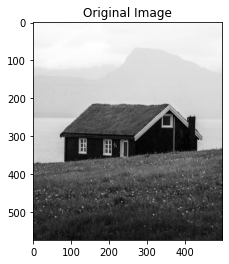

In [ ]:
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

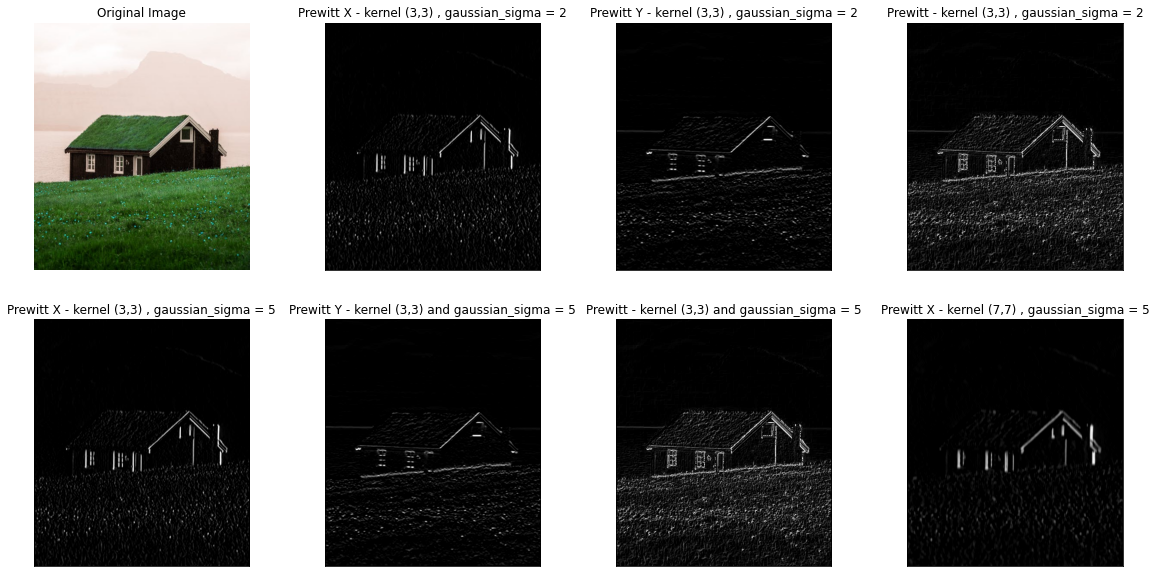

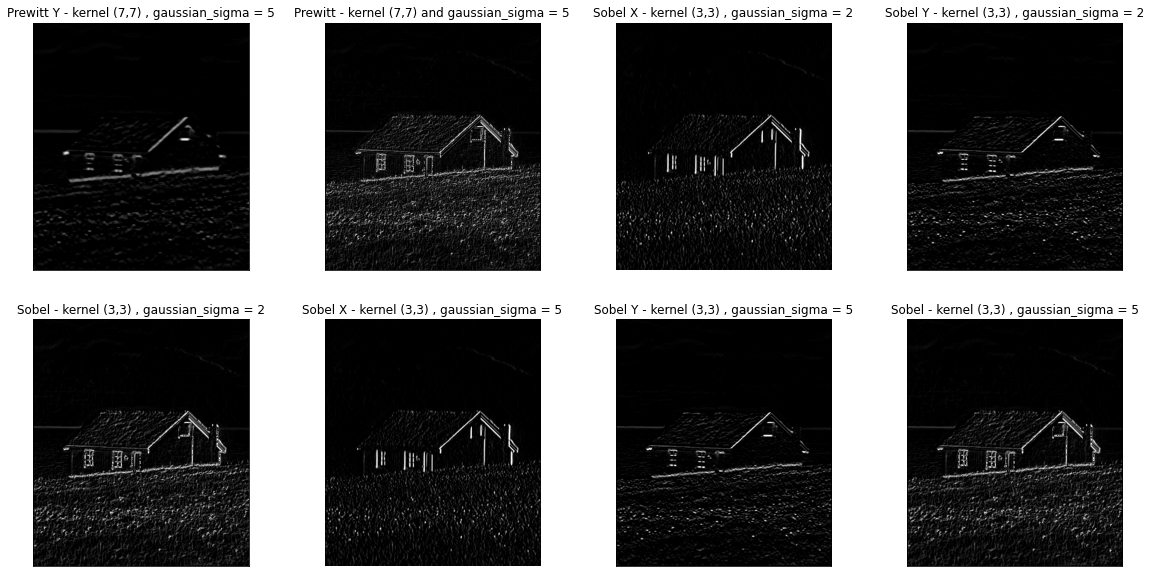

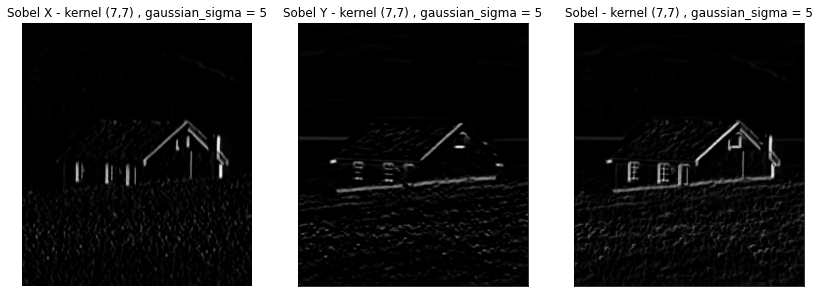

In [ ]:
fig, axes = plt.subplots(2, 4,figsize=(20,10))


plt.subplot(241), plt.imshow(colored_image, cmap='gray'), plt.axis('off')
plt.title('Original Image')
plt.subplot(242),plt.imshow(Prewittx(image,(3,3),2), cmap = 'gray')
plt.title('Prewitt X - kernel (3,3) , gaussian_sigma = 2'), plt.xticks([]), plt.yticks([])
plt.subplot(243),plt.imshow(Prewitty(image,(3,3),2), cmap = 'gray')
plt.title('Prewitt Y - kernel (3,3) , gaussian_sigma = 2'), plt.xticks([]), plt.yticks([])
plt.subplot(244),plt.imshow(Prewittxy(image,(3,3),2),  cmap = 'gray')
plt.title('Prewitt - kernel (3,3) , gaussian_sigma = 2'), plt.xticks([]), plt.yticks([])
plt.subplot(245),plt.imshow(Prewittx(image,(3,3),5), cmap = 'gray')
plt.title('Prewitt X - kernel (3,3) , gaussian_sigma = 5'), plt.xticks([]), plt.yticks([])
plt.subplot(246),plt.imshow(Prewitty(image,(3,3),5), cmap = 'gray')
plt.title('Prewitt Y - kernel (3,3) and gaussian_sigma = 5'), plt.xticks([]), plt.yticks([])
plt.subplot(247),plt.imshow(Prewittxy(image,(3,3),5),  cmap = 'gray')
plt.title('Prewitt - kernel (3,3) and gaussian_sigma = 5'), plt.xticks([]), plt.yticks([])
plt.subplot(248),plt.imshow(Prewittx(image,(7,7),5), cmap = 'gray')
plt.title('Prewitt X - kernel (7,7) , gaussian_sigma = 5'), plt.xticks([]), plt.yticks([])

plt.show()

fig, axes = plt.subplots(2, 4,figsize=(20,10))

plt.subplot(241),plt.imshow(Prewitty(image,(7,7),5), cmap = 'gray')
plt.title('Prewitt Y - kernel (7,7) , gaussian_sigma = 5'), plt.xticks([]), plt.yticks([])
plt.subplot(242),plt.imshow(Prewittxy(image,(7,7),5),  cmap = 'gray')
plt.title('Prewitt - kernel (7,7) and gaussian_sigma = 5'), plt.xticks([]), plt.yticks([])
plt.subplot(243), plt.imshow(Sobelx(image,(3,3),2), cmap='gray'), plt.axis('off')
plt.title('Sobel X - kernel (3,3) , gaussian_sigma = 2')
plt.subplot(244),plt.imshow(Sobely(image,(3,3),2), cmap = 'gray')
plt.title('Sobel Y - kernel (3,3) , gaussian_sigma = 2'), plt.xticks([]), plt.yticks([])
plt.subplot(245),plt.imshow(Sobelxy(image,(3,3),2), cmap = 'gray')
plt.title('Sobel - kernel (3,3) , gaussian_sigma = 2'), plt.xticks([]), plt.yticks([])
plt.subplot(246), plt.imshow(Sobelx(image,(3,3),5), cmap='gray'), plt.axis('off')
plt.title('Sobel X - kernel (3,3) , gaussian_sigma = 5')
plt.subplot(247),plt.imshow(Sobely(image,(3,3),5), cmap = 'gray')
plt.title('Sobel Y - kernel (3,3) , gaussian_sigma = 5'), plt.xticks([]), plt.yticks([])
plt.subplot(248),plt.imshow(Sobelxy(image,(3,3),5), cmap = 'gray')
plt.title('Sobel - kernel (3,3) , gaussian_sigma = 5'), plt.xticks([]), plt.yticks([])

plt.show()


fig, axes = plt.subplots(1, 3,figsize=(14,7))

plt.subplot(131), plt.imshow(Sobelx(image,(7,7),5), cmap='gray'), plt.axis('off')
plt.title('Sobel X - kernel (7,7) , gaussian_sigma = 5')
plt.subplot(132),plt.imshow(Sobely(image,(7,7),5), cmap = 'gray')
plt.title('Sobel Y - kernel (7,7) , gaussian_sigma = 5'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(Sobelxy(image,(7,7),5), cmap = 'gray')
plt.title('Sobel - kernel (7,7) , gaussian_sigma = 5'), plt.xticks([]), plt.yticks([])

plt.show()

Prewitt is a very common usage gradient operator that digitally approximates the first derivatives Gx and Gy. Although it's simple to implement, we can notice that its results are noisy. Sobel detector is similar to Prewitt, but unlike Prewitt is not a flat operator meaning that not all the weights of the kernel have the same value and it tends to give emphasis on pixels that are closer to the center of the kernel.
In both cases of gradient detectors, it is true that the main object of the image, meaning the house,  is obvious, but despite the exhausting experiments with parameters, we couldn't get rid off noise that is mainly visible in grass and the roof.
However, our goal is to display the main edges of the image, so we try canny algorithm in next step.

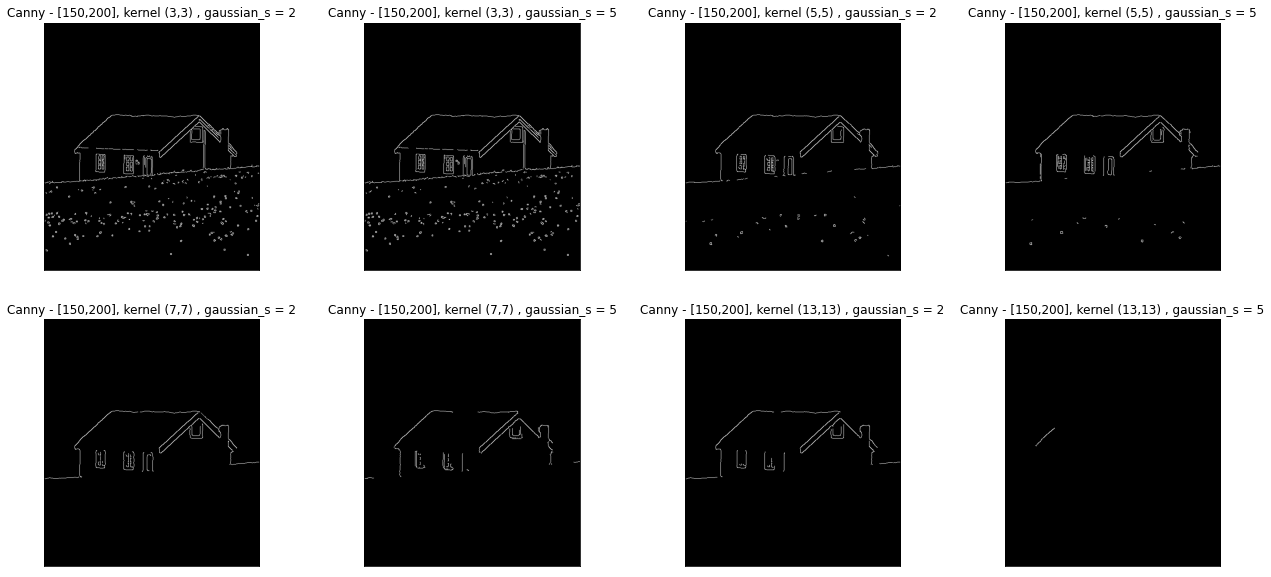

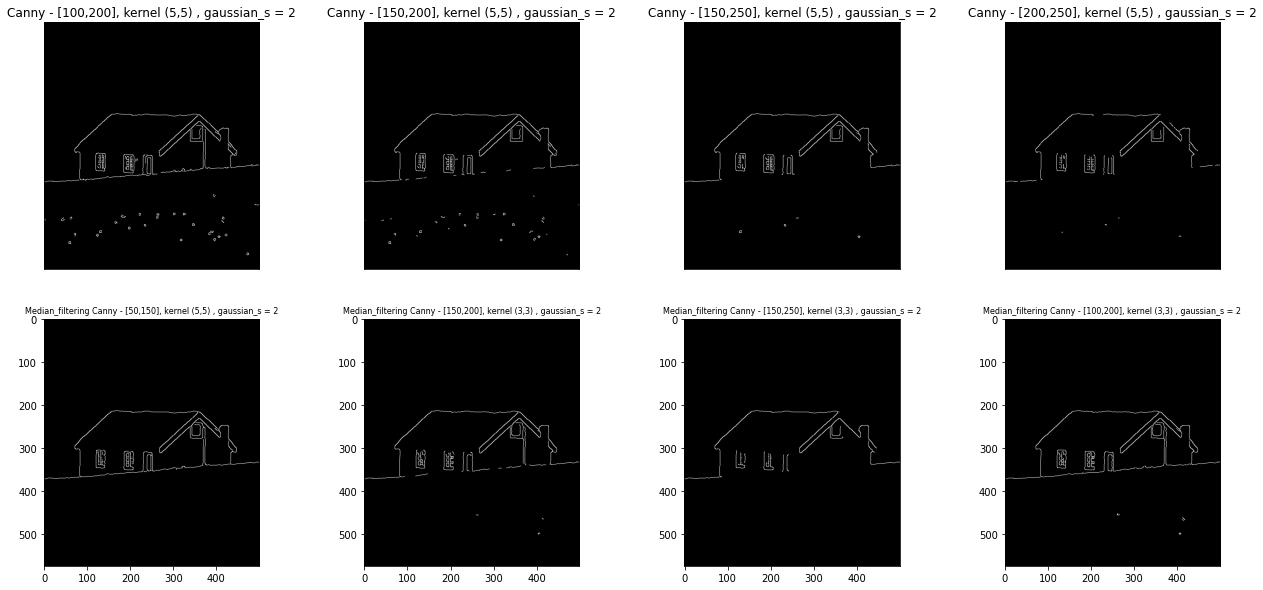

In [ ]:
fig, axes = plt.subplots(2, 4,figsize=(22,10))

plt.subplot(241),plt.imshow(canny(image,150,200,(3,3),2), cmap = 'gray')
plt.title('Canny - [150,200], kernel (3,3) , gaussian_s = 2'), plt.xticks([]), plt.yticks([])
plt.subplot(242),plt.imshow(canny(image,150,200,(3,3),5), cmap = 'gray')
plt.title('Canny - [150,200], kernel (3,3) , gaussian_s = 5'), plt.xticks([]), plt.yticks([])
plt.subplot(243),plt.imshow(canny(image,150,200,(5,5),2), cmap = 'gray')
plt.title('Canny - [150,200], kernel (5,5) , gaussian_s = 2'), plt.xticks([]), plt.yticks([])
plt.subplot(244),plt.imshow(canny(image,150,200,(5,5),5), cmap = 'gray')
plt.title('Canny - [150,200], kernel (5,5) , gaussian_s = 5'), plt.xticks([]), plt.yticks([])
plt.subplot(245),plt.imshow(canny(image,150,200,(7,7),2), cmap = 'gray')
plt.title('Canny - [150,200], kernel (7,7) , gaussian_s = 2'), plt.xticks([]), plt.yticks([])
plt.subplot(246),plt.imshow(canny(image,150,200,(7,7),5), cmap = 'gray')
plt.title('Canny - [150,200], kernel (7,7) , gaussian_s = 5'), plt.xticks([]), plt.yticks([])
plt.subplot(247),plt.imshow(canny(image,150,200,(13,13),2), cmap = 'gray')
plt.title('Canny - [150,200], kernel (13,13) , gaussian_s = 2'), plt.xticks([]), plt.yticks([])
plt.subplot(248),plt.imshow(canny(image,150,200,(13,13),5), cmap = 'gray')
plt.title('Canny - [150,200], kernel (13,13) , gaussian_s = 5'), plt.xticks([]), plt.yticks([])

plt.show()

fig, axes = plt.subplots(2, 4,figsize=(22,10))

plt.subplot(241),plt.imshow(canny(image,100,200,(5,5),2), cmap = 'gray')
plt.title('Canny - [100,200], kernel (5,5) , gaussian_s = 2'), plt.xticks([]), plt.yticks([])
plt.subplot(242),plt.imshow(canny(image,150,200,(5,5),2), cmap = 'gray')
plt.title('Canny - [150,200], kernel (5,5) , gaussian_s = 2'), plt.xticks([]), plt.yticks([])
plt.subplot(243),plt.imshow(canny(image,150,250,(5,5),2), cmap = 'gray')
plt.title('Canny - [150,250], kernel (5,5) , gaussian_s = 2'), plt.xticks([]), plt.yticks([])
plt.subplot(244),plt.imshow(canny(image,200,250,(5,5),2), cmap = 'gray')
plt.title('Canny - [200,250], kernel (5,5) , gaussian_s = 2'), plt.xticks([]), plt.yticks([])

#apply median bluring
img_median = cv2.medianBlur(image, 5)

plt.subplot(245),plt.imshow(canny(img_median,50,150,(5,5),2), cmap = 'gray')
plt.title('Median_filtering Canny - [50,150], kernel (5,5) , gaussian_s = 2', fontsize=8)
plt.subplot(246),plt.imshow(canny(img_median,150,200,(3,3),2), cmap = 'gray')
plt.title('Median_filtering Canny - [150,200], kernel (3,3) , gaussian_s = 2', fontsize=8)
plt.subplot(247),plt.imshow(canny(img_median,150,250,(5,5),2), cmap = 'gray')
plt.title('Median_filtering Canny - [150,250], kernel (3,3) , gaussian_s = 2', fontsize=8)
plt.subplot(248),plt.imshow(canny(img_median,100,200,(3,3),2), cmap = 'gray')
plt.title('Median_filtering Canny - [100,200], kernel (3,3) , gaussian_s = 2', fontsize=8)


plt.show()


As we can observe from the printed outputs, the Canny algorithm is more efficient in getting the main edges. For bigger values of kernel size or sigma value of Gaussian blur, we notice loss of information. Also, even though we experimented with many hyperparameters, we can still find some edges of grass. For this reason we tried applying additionaly a median blur.

The median blur operation is similar to the Gaussian blur operation and what it basically does is get the median of all the pixels under the kernel area and replace the central element with this value.

Overall, we can conclude that we got the best results when applying the median blur.






As last approach for edge detection, we tried using mathematical morphology. Specifically we will experiment on the following proposed morphological transformations suitable for grayscale images:


*   Morphological Gradient
*   Open-Closing
*   Tophat
*   Tophat with reconstruction





In [ ]:
# Reconstruction based on dilation
def imreconstruct(marker: np.ndarray, mask: np.ndarray, radius: int = 1):
    """Iteratively expand the markers white keeping them limited by the mask during each iteration.
    :param marker: Grayscale image where initial seed is white on black background.
    :param mask: Grayscale mask where the valid area is white on black background.
    :param radius Can be increased to improve expansion speed while causing decreased isolation from nearby areas.
    :returns A copy of the last expansion.
    Written By Semnodime.
    """
    kernel = np.ones(shape=(radius * 2 + 1,) * 2, dtype=np.uint8)
    while True:
        expanded = cv2.dilate(src=marker, kernel=kernel)
        cv2.bitwise_and(src1=expanded, src2=mask, dst=expanded)

        # Termination criterion
        if (marker == expanded).all():
            return expanded
        marker = expanded


# Alternating sequential open-close filrering with a series of SEs of increasing size
def open_close(image, min_range, max_range):
    for i in range(min_range, max_range):
        close = cv2.morphologyEx(image, cv2.MORPH_CLOSE, np.ones((i, i), np.uint8))
        open = cv2.morphologyEx(close, cv2.MORPH_OPEN, np.ones((i, i), np.uint8))
    return open

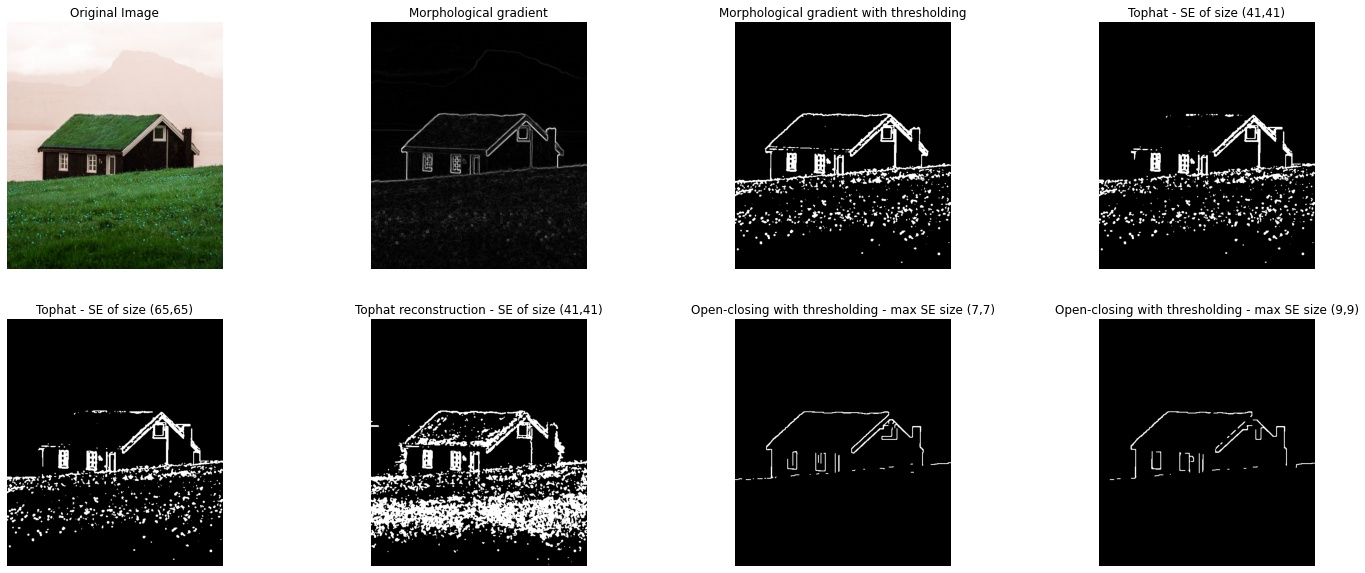

In [ ]:
#Load image with imread command
colored_image = cv2.imread('image11.jpg')
#Convert the input image into grayscale color space
image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)
img_median = cv2.medianBlur(image, 5)

fig, axes = plt.subplots(2, 4,figsize=(25,10))

# Plot the original image

plt.subplot(241), plt.imshow(colored_image, cmap='gray'), plt.axis('off'), plt.title('Original Image')

# Morphological gradient
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
gradient = cv2.morphologyEx(img_median, cv2.MORPH_GRADIENT, kernel)

plt.subplot(242), plt.imshow(gradient, cmap='gray'), plt.axis('off'), plt.title('Morphological gradient')

# Compute morphological gradient adding global thresholding
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

# Plot histogram of the grayscale image in order to select a suitable threshold
dst = cv2.calcHist(gradient, [0], None, [256], [0,256])

#plt.hist(gradient.ravel(),256,[0,256])
#plt.title('Histogram for gray scale image')
#plt.show()

# Global thresholding for the binarization of the image
threshold = cv2.threshold(gradient, 50, 255, cv2.THRESH_BINARY)
median_blur = cv2.medianBlur(threshold[1], 3)
plt.subplot(243), plt.imshow(median_blur , cmap='gray'), plt.axis('off'), plt.title('Morphological gradient with thresholding')


# Τophat

tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, np.ones((41,41)))
gradient = cv2.morphologyEx(tophat, cv2.MORPH_GRADIENT, np.ones((3,3), np.uint8))
threshold = cv2.threshold(gradient, 50, 255, cv2.THRESH_BINARY)
median_blur = cv2.medianBlur(threshold[1], 3)

plt.subplot(244), plt.imshow(median_blur , cmap='gray'), plt.axis('off'), plt.title('Tophat - SE of size (41,41)')

tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, np.ones((65,65)))
gradient = cv2.morphologyEx(tophat, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8))
threshold = cv2.threshold(gradient, 50, 255, cv2.THRESH_BINARY)
median_blur = cv2.medianBlur(threshold[1], 3)

plt.subplot(245), plt.imshow(median_blur , cmap='gray'), plt.axis('off'), plt.title('Tophat - SE of size (65,65)')

# Τophat reconstruction

marker = cv2.erode(image, np.ones((41,41), np.uint8), iterations=1)
recon = imreconstruct(marker, image)
tophat_reconstruction = cv2.subtract(image, recon)
gradient = cv2.morphologyEx(tophat_reconstruction, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8))
threshold = cv2.threshold(gradient, 50, 255, cv2.THRESH_BINARY)
median_blur = cv2.medianBlur(threshold[1], 3)

plt.subplot(246), plt.imshow(median_blur , cmap='gray'), plt.axis('off'), plt.title('Tophat reconstruction - SE of size (41,41)')

# Open-Closing

open = open_close(image, 3,7)

gradient = cv2.morphologyEx(open, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8))
threshold = cv2.threshold(gradient, 50, 255, cv2.THRESH_BINARY)
median_blur = cv2.medianBlur(threshold[1], 3)
plt.subplot(247), plt.imshow(median_blur, cmap='gray'), plt.axis('off'), plt.title( 'Open-closing with thresholding - max SE size (7,7)')

open = open_close(image, 3,9)

gradient = cv2.morphologyEx(open, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8))
threshold = cv2.threshold(gradient, 50, 255, cv2.THRESH_BINARY)
median_blur = cv2.medianBlur(threshold[1], 3)

plt.subplot(248), plt.imshow(median_blur, cmap='gray'), plt.axis('off'), plt.title( 'Open-closing with thresholding - max SE size (9,9)')

plt.show()

As we can observe, the closer result to main edges was when using open-closing method, but the results didn't overcome Canny algorithm which produced more detailed edges.

**1.2** Estimate the angle (with respect to the horizontal axis) of the diagonal edges of the roof.


---



The key point in this task is the addition of the Hough Transformation that maps the lines in the Hough space, which resembles polar coordinates. That way, each line is defined by the parameters ρ and θ where ρ is the norm distance of the line from origin and θ is the angle between the norm and the horizontal x axis. So, in terms of ρ and θ the line equation is expressed like bellow:

> ρ=xcos(θ)+ysin(θ)

The steps we follow to solve this sub-exercise are the following:


1.   Perform edge detection using the best approach found in previous sub-exercise
2.   Create diagonal matrices as "structure elements" in order to isolate lines of the roof by applying erosion
3.   Apply Hough Transformation in order to retrieve the lines and thetas
4.  Apply calculated formulas based on thetas in order to calculate the angles with respect to horizontal axes in initial cartesian coordinate system
5. Display found lines on the original image






The angles of diagonal (φ1) and antidiagonal (φ2) edges with respect to the horizontal axis are calculated as follows:

(small bottom left triangle)

180° = 90° + φ1 + θ1 => φ1 = 90° - θ1

180° = φ2 + w => φ2 = 180° - w

(small upper left traingle)

φ2 = 180° - (90° - k) = 90° + k = 90° + (180° - θ2) = 270° - θ2

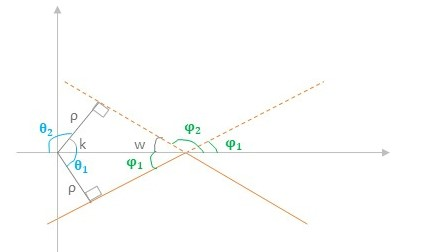

Angles found for every edge in roof:  [41.99999866427831, 42.999999830470706, 42.999999830470706, 41.99999866427831, 42.999999830470706, 134.99999965837733, 136.0000076547589, 41.99999866427831, 44.000000996663104]
Estimated angle of diagonal roof edges:  42.71428521155859
Estimated angle of antidiagonal roof edges:  135.5000036565681


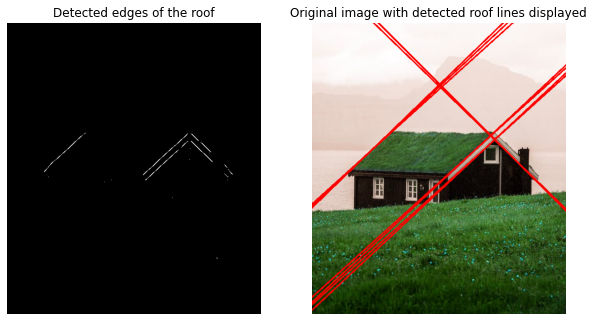

In [ ]:
#Load image with imread command
colored_image = cv2.imread('image11.jpg')
#Convert the input image into grayscale color space
image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)

# Edge detection based on best found results of previous step
img_median = cv2.medianBlur(image, 5)
img_edges = canny(img_median,100,200,(3,3),2)

# Use diagonal matrices to get right and left edges of the roof
r = np.zeros((5,5), np.uint8)
np.fill_diagonal(r, 1)

l = np.zeros((5,5), np.uint8)
np.fill_diagonal(l[::-1], 1)

right = cv2.erode(img_edges, r, iterations=1)
left = cv2.erode(img_edges, l, iterations=1)

# Concatenate to compose total roof
roof = cv2.add(right, left)

fig, axes = plt.subplots( 1, 2,figsize=(10,10))
plt.subplot(121), plt.imshow(roof, cmap='gray'), plt.axis('off'), plt.title( 'Detected edges of the roof')

# apply hough line transformation to detect the thetas that contribute most in respective lines
lines = cv2.HoughLines(roof, 1, np.pi / 180, 50)

edge_degrees = []
for line in lines:
    for r, theta in line:
        # append every degree value that match with hough lines transform

        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * r
        y0 = b * r
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        theta_degrees = math.degrees(theta)

        if theta_degrees< 90:
          angle = 90 - theta_degrees
        else:
          angle = 270 - theta_degrees

        # append the angles to a list
        edge_degrees.append(angle)

        cv2.line(colored_image, (x1, y1), (x2, y2), (255, 0, 0), 2)


print("Angles found for every edge in roof: ", edge_degrees)
print("Estimated angle of diagonal roof edges: ", np.average([i for i in edge_degrees  if i<90]))
print("Estimated angle of antidiagonal roof edges: ", np.average([i for i in edge_degrees  if i>90]))

plt.subplot(122), plt.imshow(colored_image, cmap='gray'), plt.axis('off'), plt.title('Original image with detected roof lines displayed')
plt.show()

As we can view from the displayed results, the Hough Transformation brought 9 lines that cross the roof diagonals and antidiagonals. For this reason we calculated the respective average value as presented above for the diagonal and antidiagonal roof edges.

**1.3** Find the corners in the image11.jpg.



---



In this sub-exercise for the corner detection task two models will be implemented, the Harris corner detector and the Shi-Tomasi corner detector.

In an image we can identify 3 kind of regions: flat regions where there is no variation in intensity in both directions, edges where there is variation in one of the variations and corners that have changes in both directions and are unique points. Corners could also be explained as intersection of two edges. Generally corners are points of interest which provide rich image content information and are usefull in applications like motion detection, image registration, video tracking, and object recognition.



In Harris corner detection model, the hessian matrix of a fixed-size window that slides through the image is build. The hessian matrix M states the intensity variation (2nd derivative) in x, y and xy direction. So, the corners are identified by calculating the following R score:         

 R = det(H) − k*trace(H)

where k is an empirical constant value.

Depending on the calculated value of R score, the window is then classified as consisting of flat, edge or a corner. So, when R is small, the region is considered a flat region. When R is less than 0, the region is considered an edge, and R is large, the region is considered a corner.
Also, to pick up the optimal corners, we can use non-maximum suppression.
We can apply Harris corner detection by using the cv2.cornerHarris() method, which takes the following arguments:

src: The input image

blockSize: The neighborhood window size

ksize: The aperture for Sobel operator (This value is helpful for the calculation of the R score)

k: The harris detector free parameter

The Shi-Tomasi model follows the same approach as Harris model but uses a different scoring function, specifiacally the one bellow:

R = min( λ_1, λ_2)

If it is a greater than a threshold value, it is considered as a corner.

In [ ]:
def harris(image_name, blockSize, ksize, k, threshold):
  #Load image with imread command
  colored_image = cv2.imread(image_name)
  #Convert the input image into grayscale color space
  image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)
  image = cv2.GaussianBlur(image, (3,3), 3)

  # Modify the data type setting to 32-bit floating point and apply Harris corner detection
  image_flt = np.float32(image)
  dst = cv2.cornerHarris(image, blockSize, ksize, k)

  # Dilate the output and revert back to the original image, with optimal threshold value
  dst = cv2.dilate(dst, None)
  colored_image[dst > threshold* dst.max()] = [255, 0, 0]

  return colored_image

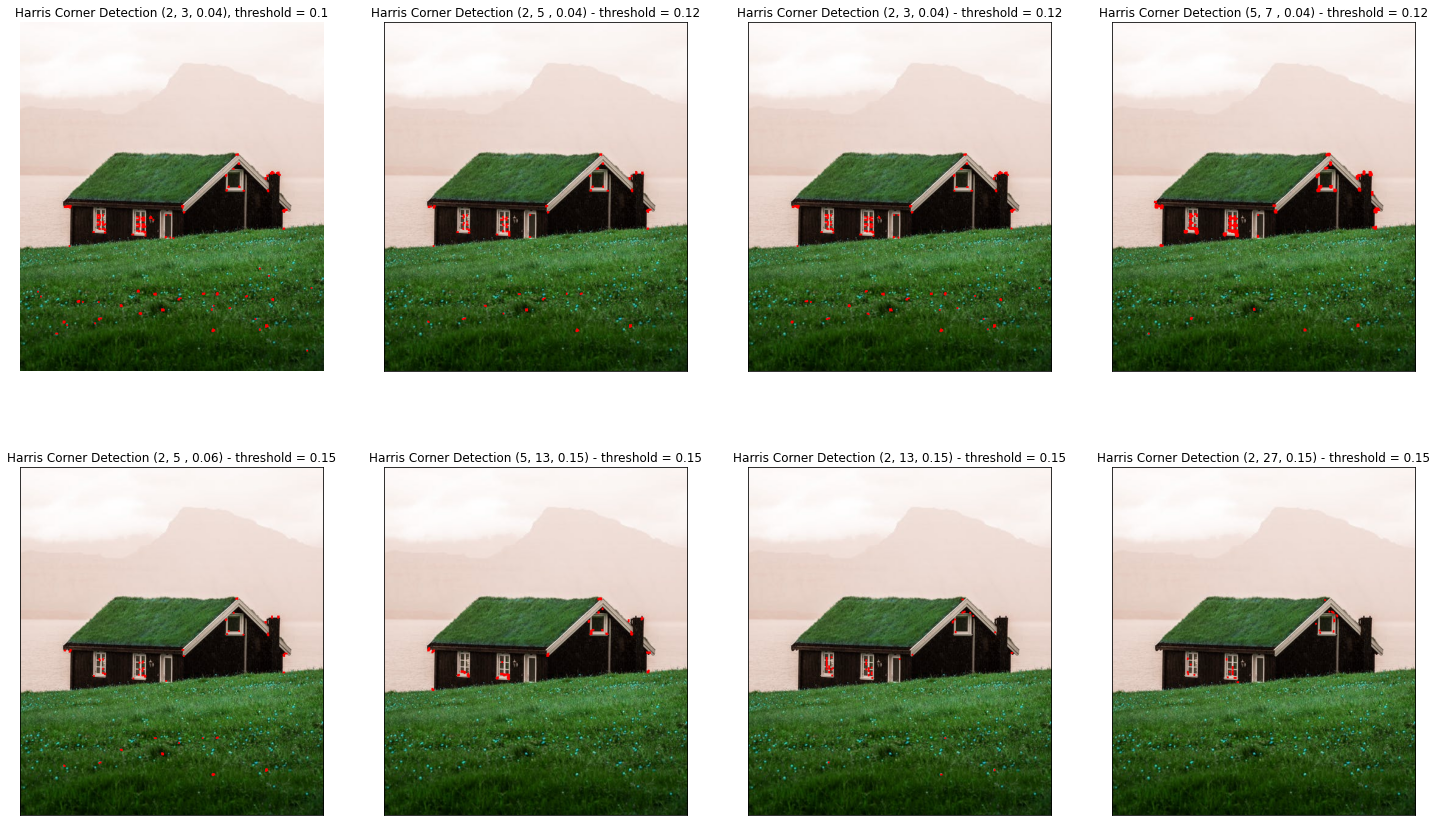

In [ ]:
fig, axes = plt.subplots(2, 4,figsize=(25,15))

plt.subplot(241), plt.imshow(harris('image11.jpg',2, 3 ,0.04, 0.1)), plt.axis('off')
plt.title('Harris Corner Detection (2, 3, 0.04), threshold = 0.1')

plt.subplot(242),plt.imshow(harris('image11.jpg',2, 5, 0.04, 0.12))
plt.title('Harris Corner Detection (2, 5 , 0.04) - threshold = 0.12'), plt.xticks([]), plt.yticks([])

plt.subplot(243),plt.imshow(harris('image11.jpg',2, 3, 0.04, 0.12))
plt.title('Harris Corner Detection (2, 3, 0.04) - threshold = 0.12'), plt.xticks([]), plt.yticks([])

plt.subplot(244),plt.imshow(harris('image11.jpg',5, 7 ,0.04, 0.12))
plt.title('Harris Corner Detection (5, 7 , 0.04) - threshold = 0.12'), plt.xticks([]), plt.yticks([])

plt.subplot(245),plt.imshow(harris('image11.jpg',2, 5, 0.06, 0.15))
plt.title('Harris Corner Detection (2, 5 , 0.06) - threshold = 0.15'), plt.xticks([]), plt.yticks([])

plt.subplot(246),plt.imshow(harris('image11.jpg',5, 13 ,0.15, 0.15))
plt.title('Harris Corner Detection (5, 13, 0.15) - threshold = 0.15'), plt.xticks([]), plt.yticks([])

plt.subplot(247),plt.imshow(harris('image11.jpg',2, 13 ,0.15, 0.15))
plt.title('Harris Corner Detection (2, 13, 0.15) - threshold = 0.15'), plt.xticks([]), plt.yticks([])

plt.subplot(248),plt.imshow(harris('image11.jpg',2, 27 ,0.15, 0.15))
plt.title('Harris Corner Detection (2, 27, 0.15) - threshold = 0.15'), plt.xticks([]), plt.yticks([])

plt.show()


Harris algorithm seems to produce decent results for the last three sets of parameters. As we noticed, increasing the threshold value helped us avoid corners detected on the grass and also by increasing the size of the aperture of Sobel operator helped us focus on corners located on the windows of the house.

In [ ]:
def shiTomasi(image_name, maxCorners, qualityLevel, minDistance):
  #Load image with imread command
  colored_image = cv2.imread(image_name)
  #Convert the input image into grayscale color space
  image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)
  image = cv2.GaussianBlur(image, (5,5), 3)

  corners = cv2.goodFeaturesToTrack(image, maxCorners, qualityLevel, minDistance)
  corners = np.int0(corners)
  for i in corners:
    x,y = i.ravel()
    cv2.circle(colored_image,(x,y),3,255,-1)

  return colored_image

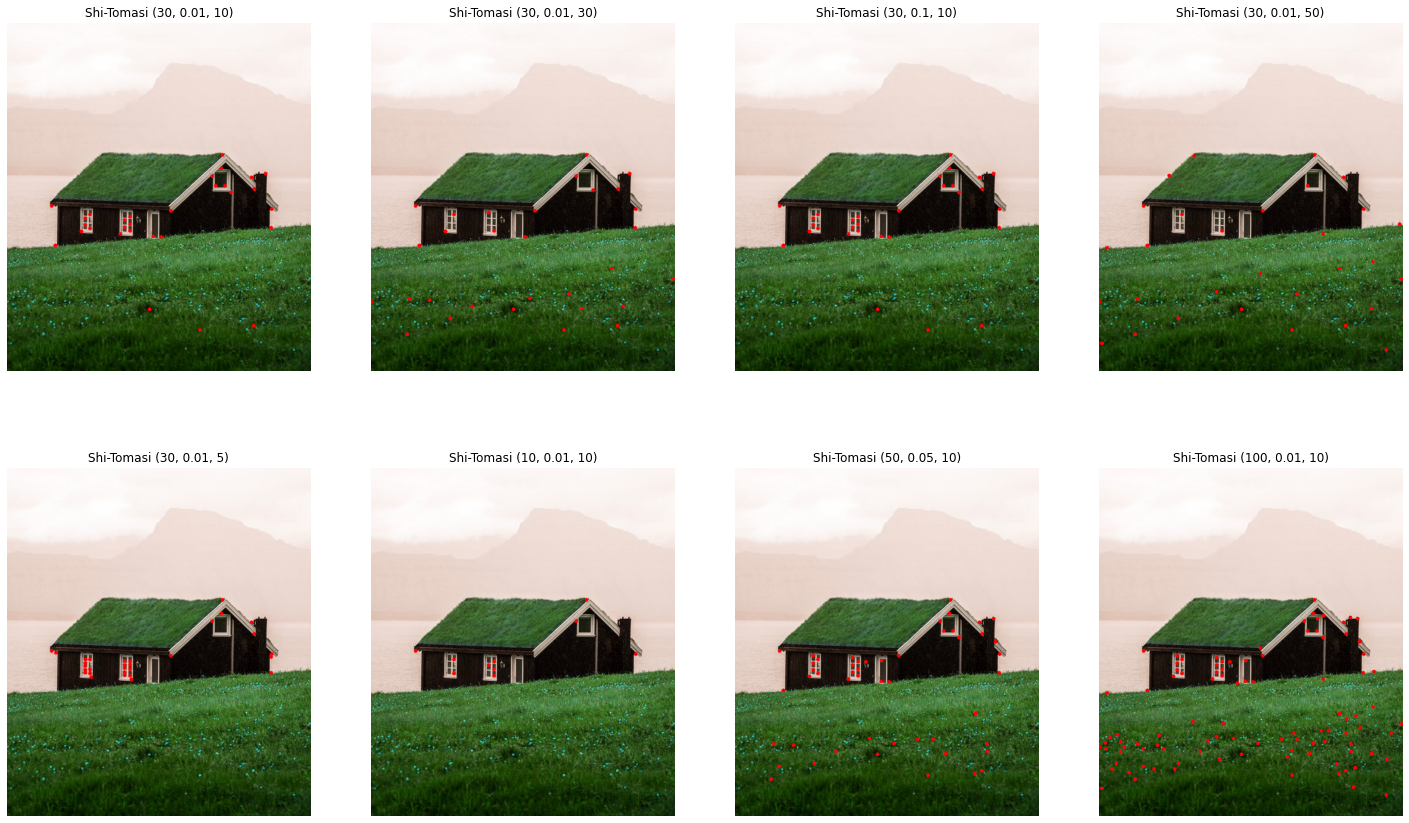

In [ ]:
fig, axes = plt.subplots(2, 4,figsize=(25,15))

plt.subplot(241),plt.imshow(shiTomasi('image11.jpg', 30, 0.01, 10)), plt.axis('off')
plt.title('Shi-Tomasi (30, 0.01, 10)'), plt.xticks([])

plt.subplot(242),plt.imshow(shiTomasi('image11.jpg', 30, 0.01, 30)), plt.axis('off')
plt.title('Shi-Tomasi (30, 0.01, 30)'), plt.xticks([]), plt.yticks([])

plt.subplot(243),plt.imshow(shiTomasi('image11.jpg', 30, 0.1, 10)), plt.axis('off')
plt.title('Shi-Tomasi (30, 0.1, 10)'), plt.xticks([]), plt.yticks([])

plt.subplot(244),plt.imshow(shiTomasi('image11.jpg', 30, 0.01, 50)), plt.axis('off')
plt.title('Shi-Tomasi (30, 0.01, 50)'), plt.xticks([]), plt.yticks([])

plt.subplot(245),plt.imshow(shiTomasi('image11.jpg', 30, 0.01, 5)), plt.axis('off')
plt.title('Shi-Tomasi (30, 0.01, 5)'), plt.xticks([]), plt.yticks([])

plt.subplot(246),plt.imshow(shiTomasi('image11.jpg', 10, 0.01, 10)), plt.axis('off')
plt.title('Shi-Tomasi (10, 0.01, 10)'), plt.xticks([]), plt.yticks([])

plt.subplot(247),plt.imshow(shiTomasi('image11.jpg', 50, 0.05, 10)), plt.axis('off')
plt.title('Shi-Tomasi (50, 0.05, 10)'), plt.xticks([]), plt.yticks([])

plt.subplot(248),plt.imshow(shiTomasi('image11.jpg', 100, 0.01, 10)), plt.axis('off')
plt.title('Shi-Tomasi (100, 0.01, 10)'), plt.xticks([]), plt.yticks([])

plt.show()

As we can observe Shi-Tomasi method was less effective in detecting the corners in comparison with the Harris algorithm. In most cases either some corners were detected on the grass or corners defined by different elements of the image like the grass and house edges or roof edges and the sea. Also more blurring was needed in comparison with Harris model.

Overall we can say that the results for the sets of parameters (30, 0.01, 5) and (10, 0.01, 10) are acceptable but will not be prefered for the next task of the exercise.

1.4. Based on the detected corners, locate the windows.


---



For this task we will use the set of parameters tried in previous sub-exercise for corner detection that best approximates the areas of windows. The most suitable results were produced by Harris algorithm for the set of parameters (2, 27, 0.15) and threshold of 0.15.

We additionaly modify a bit the parameters in Canny algorithm in order to capture more detailed edges in the areas of windows. Also we increased the kernel size in median blur in order to avoid bigger sized edges like in the roof top and focus on smaller ones found in windows.

Then, for the detected edges and corners, we perform iterative dilation in order to "join" the isolated edges and corners of windows. The we display the results on the original image.





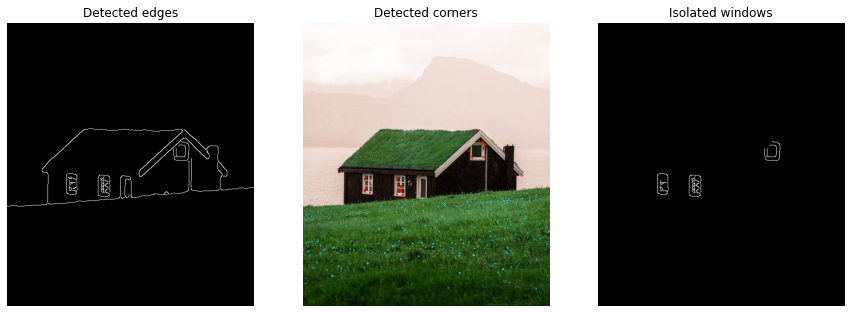

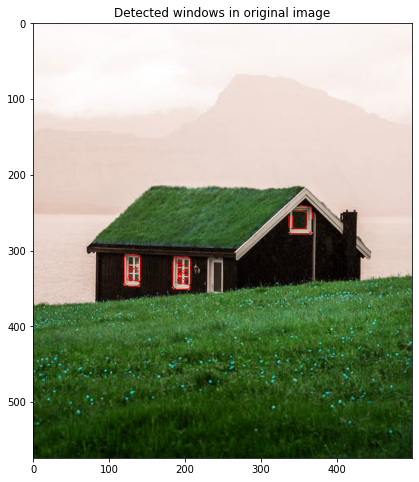

In [ ]:
#Load image with imread command
colored_image = cv2.imread('image11.jpg')
#Convert the input image into grayscale color space
image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(image, (3,3), 2)

# Edge detection using Canny algorithm and median blur
edges = cv2.medianBlur(image, 7)
edges = canny(edges, 50, 150, (3, 3), 5)

# Corner detection using Harris algorithm
image_float = np.float32(image)
dst = cv2.cornerHarris(image_float, 2, 27, 0.15)

# Set a threshold so that the points that pass it to be marked in red afterwards indicating detected corners.
detected_corners = dst > 0.15 * dst.max()
detected_corners = np.where(detected_corners == True, 255, detected_corners)
detected_corners = detected_corners.astype('uint8')

# Perform iterative dilation to join the detected corners with edges to form windows
window = detected_corners
for i in range(300):
    window = cv2.dilate(window, np.ones((3, 3), np.uint8), iterations=1)
    window = edges * window

# Display with red the windows areas in the original image
colored_image[window == 255] = [255, 0, 0]


fig, axes = plt.subplots(1, 3,figsize=(15,15))

plt.subplot(131),plt.imshow(edges, cmap = 'gray'), plt.axis('off')
plt.title('Detected edges'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(harris('image11.jpg',2, 27, 0.15, 0.16), cmap = 'gray'), plt.axis('off')
plt.title('Detected corners'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(window, cmap = 'gray'), plt.axis('off')
plt.title('Isolated windows'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(8,8))
plt.imshow(colored_image, cmap='gray')
plt.title('Detected windows in original image')
plt.show()

Both windows on the left wall were detected additionally to the small window closer to the roof.

2.1 Estimate the angle (with respect to the horizontal axis) of the billiard cue in
image31.jpg. To verify your answer, rotate the input image accordingly. The
result should be like image32.jpg.


---



To find the angle (with respect to the horizontal axis) of the billiard cue, we combine methods that we used in the previous exercise.
Firstly, we detect the edges of the image using Canny algorithm. Secondly, we use erosion with a line structure element in order to isolate the billiard cue. In this step, we take advantage of the given hint that the billiard cue is the only element of the image with straight edges and specifically diagonal.
Next, after isolating the billiard cue we use Hough Transformation in order to extract the lines and the angles with respect to the horizontal axis. This way we compute the angle formed by the billiard cue.
Lastly, we rotate the input image by the estimated angle to verify that it looks alike the image32.


Αngles (with respect to the horizontal axis) of the billiard cue:  [50.99999891472613, 52.000000080918525] degrees


Estimated angle (with respect to the horizontal axis) of the billiard cue: 51.49999949782233 degrees




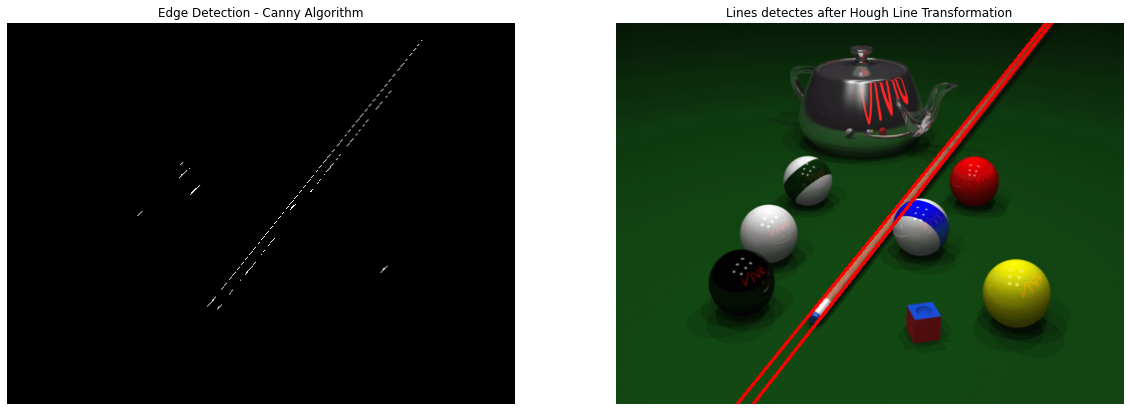

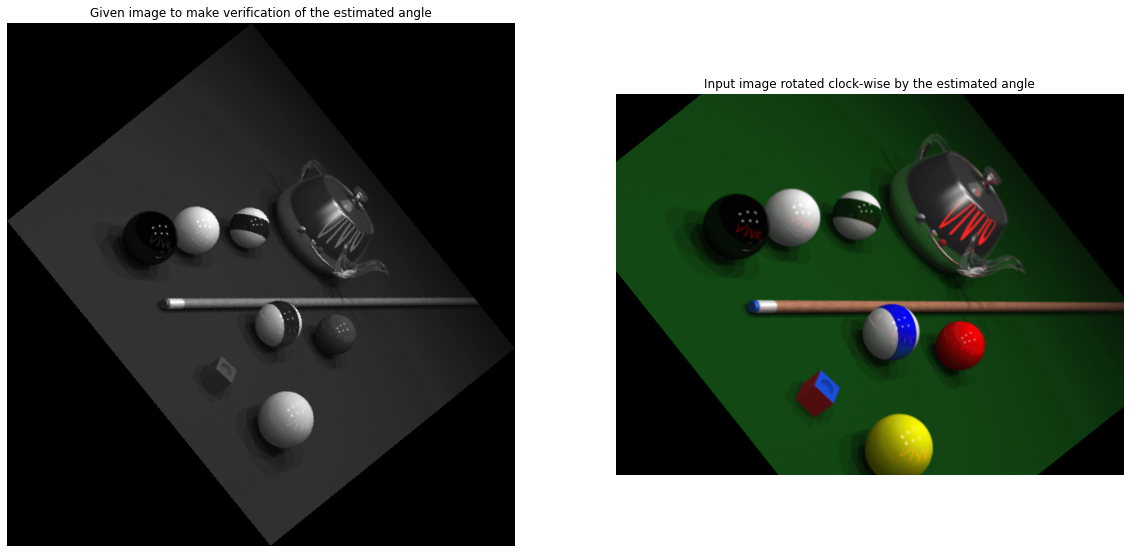

In [ ]:
#Load image with imread command and convert into rgb and grayscale space
colored_image = cv2.imread("image31.png")
colored_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(colored_image, cv2.COLOR_RGB2GRAY)

# Edge Detection using Canny algorithm like in 1.2
edges = cv2.medianBlur(image, 5)
edges = canny(edges, 150, 200, (3, 3), 5)

# Create diagonal structure elements that correspond to billiard cue
cue = np.zeros((7, 7), np.uint8)
np.fill_diagonal(cue[::-1], 1)

# Isolate billiard cue from detected edges using erosion
cue_edges = cv2.erode(edges, cue, iterations=1)

# Line and angle detection using Hough Line Transformation
lines = cv2.HoughLines(cue_edges, 1, np.pi / 180, 40)

edge_degrees = []
for line in lines:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        theta_degrees = math.degrees(theta)

        if theta_degrees< 90:
          # For angles created between diagonal line and horizontal axis
            angle = 90 - theta_degrees
        else:
          # For angles created between anti-diagonal line (that leads from top-right towards bottom-left) and horizontal axis
            angle = 270 - theta_degrees

        # Append calculated angle to initially empty list
        edge_degrees.append(angle)
        cv2.line(colored_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Compute average angle of the ones found in previous step to make an estimation
avg_angle = np.average(edge_degrees)


verification_image = cv2.imread("image32.png")
input_image = cv2.imread("image31.png")
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
rotated_image = imutils.rotate(input_image, angle = (-1)*avg_angle)


print("Αngles (with respect to the horizontal axis) of the billiard cue: ", edge_degrees, 'degrees')
print('\n')

print('Estimated angle (with respect to the horizontal axis) of the billiard cue:', avg_angle, 'degrees')
print('\n')


fig, axes = plt.subplots(1, 2), plt.gcf().set_size_inches(20, 20)
# Plot detected edges
plt.subplot(121), plt.imshow(cue_edges, cmap='gray'), plt.axis('off'), plt.title('Edge Detection - Canny Algorithm')
# Plot lines detected by hough line transformation in input image
plt.subplot(122), plt.imshow(colored_image), plt.axis('off'), plt.title('Lines detectes after Hough Line Transformation')
plt.show()

fig, axes = plt.subplots(1, 2), plt.gcf().set_size_inches(20, 20)
# Plot the given image to make verification
plt.subplot(121), plt.imshow(verification_image, cmap='gray'), plt.axis('off'), plt.title('Given image to make verification of the estimated angle')
# Plot input image rotated by the estimated angle
plt.subplot(122), plt.imshow(rotated_image), plt.axis('off'), plt.title('Input image rotated clock-wise by the estimated angle')
plt.show()

In the first step of edge detection, we tried the best model tried in 1.2 exercise, meaning the Canny algorithm for minimum and maximum value of 150 and 200, followed by Gaussian and median blur.
Then we composed diagonal structural elements in order to isolate the billiard cue using erosion.
Then, we used Hough Line Transformation in order to identify the lines and angles that are formed by the billiard cue.

After printing the results, we can say that we have a decent approximation of the position and orientation of the biliard cue. Specifically, two lines are formed touching the outter edges of the billiard cue and forming two angles with the horizontal axis approximatelly 51 and 52 degrees. We use the average of these two values as an estimation of the angle.

Then we rotate the input image by the estimated angle and print it together with the given "image32". The two images are visually very close to each other reffering to orientation, so we can conclude that the proposed steps are efficient enough for this task.

2.2 Combine image31.jpg and image32.jpg to generate an image like image33.jpg.


---



In this sub-exercise in order to reproduce the given "image33", we'll follow some steps most of them based on morphological operators.
Firstly, we will try to extract the balls and other elements next to the billiard cue. For this purpose, we create a large enough structure element of the shape of disk and apply erosion. Then we will apply Tophat reconstruction in order to subtract the matched background items from the image.
In general, TopHat operation is usually used to extract small elements and details from given images and to enhance bright objects in a dark background.
Then, we binarize the image using global thresholding.
Then we will apply again twice erosion but with line structure elements in order to match the billiard cue. Next we reconstruct the billiard cue by applying iterative dilations.

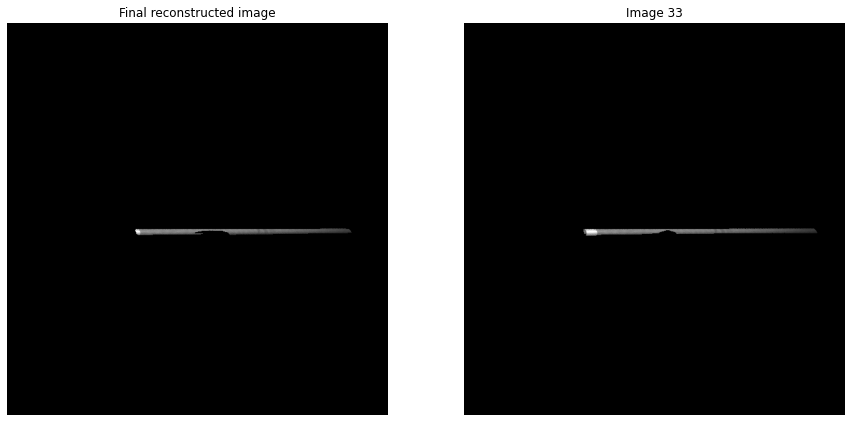

In [ ]:
image = cv2.imread("image32.png", 0)
image33 = cv2.imread("image33.png", 0)

# Create structuring elements of ellipse shape big enough to "erase" balls
disk = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,9))

# Perform tophat reconstruction
marker = cv2.erode(image, disk, iterations=5)
reconstruction = imreconstruct(marker, image)
tophat_reconstruction = cv2.subtract(image, reconstruction)

# Create line structuring element to isolate the billiard cue using erosion
line = np.ones((1, 30), np.uint8)
marker_line = cv2.erode(tophat_reconstruction, line, iterations=1)

# Global thresholding to binarize the image
threshold = cv2.threshold(marker_line, 25, 255, cv2.THRESH_BINARY)

# Repeat erosion with bigger line structuring element
line2 = np.ones((1, 50), np.uint8)
marker_line2 = cv2.erode(threshold[1], line2, iterations=1)

reconstruction = marker_line2
for i in range(500):
    reconstruction = cv2.dilate(reconstruction, np.ones((3, 3), np.uint8), iterations=1)
    reconstruction = threshold[1] * reconstruction


# Finally we reconstructed the biggest part of the billiard cue in binarized form
reconstruction[reconstruction == 255] = 1
final = reconstruction * image

fig, axes = plt.subplots(1, 2), plt.gcf().set_size_inches(15,15)
# Plot detected edges
plt.subplot(121), plt.imshow(final, cmap='gray'), plt.axis('off'), plt.title('Final reconstructed image')
# Plot lines detected by hough line transformation in input image
plt.subplot(122), plt.imshow(image33, cmap='gray'), plt.axis('off'), plt.title('Image 33')
plt.show()


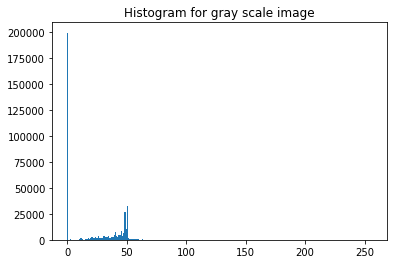

In [ ]:
# create a histogram of the blurred grayscale image to decide threshold
dst = cv2.calcHist(image, [0], None, [256], [0,256])

plt.hist(image.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.show()